In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt
import os
import scipy.stats as stats
import pycountry
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols


## Understanding the GDP share of the construction sector

In [8]:

gfcf = pd.read_csv('Transformed Data/GFCF.csv')

gfcf['Year'] = pd.to_datetime(gfcf['Year'], format='%Y')

gfcf.head(10)
#gfcf.describe()

#geo represents the country code, we can use the unique() method to get the unique values of the column.
#time is the year, we can use the unique() method to get the unique values of the column.
#unit is the unit of measurement, we can use the unique() method to get the unique values of the column.

,unit,Year,Construction Value,Country,Dwellings Value
0,CP_MEUR,2015-01-01,36418.8,Austria,14658.8
1,CP_MEUR,2016-01-01,37227.7,Austria,15249.6
2,CP_MEUR,2017-01-01,39064.2,Austria,16556.5
3,CP_MEUR,2018-01-01,42484.1,Austria,17376.3
4,CP_MEUR,2019-01-01,45310.9,Austria,18672.7
5,CP_MEUR,2020-01-01,44886.7,Austria,18940.5
6,CP_MEUR,2021-01-01,50627.9,Austria,21372.6
7,CP_MEUR,2022-01-01,56034.8,Austria,23269.4
8,CP_MEUR,2015-01-01,61834.8,Switzerland,32215.5
9,CP_MEUR,2016-01-01,60133.6,Switzerland,31895.2


In [9]:
gfcf.isnull().sum() # checking null values, none for gfcf dataset

unit                  0
Year                  0
Construction Value    0
Country               0
Dwellings Value       0
dtype: int64

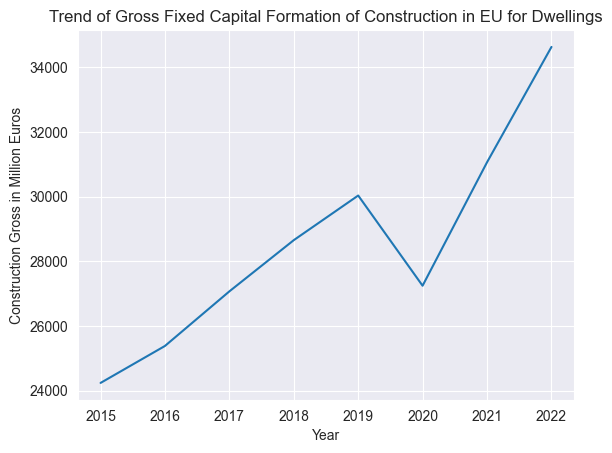

In [11]:
# Group the data by TIME_PERIOD and calculate the average production index for each year
yearly_average = gfcf.groupby('Year')['Dwellings Value'].mean()

# Plot the trend using a line plot
plt.plot(yearly_average.index, yearly_average.values)
plt.xlabel('Year')
plt.ylabel('Construction Gross in Million Euros')
plt.title('Trend of Gross Fixed Capital Formation of Construction in EU for Dwellings')
plt.show()

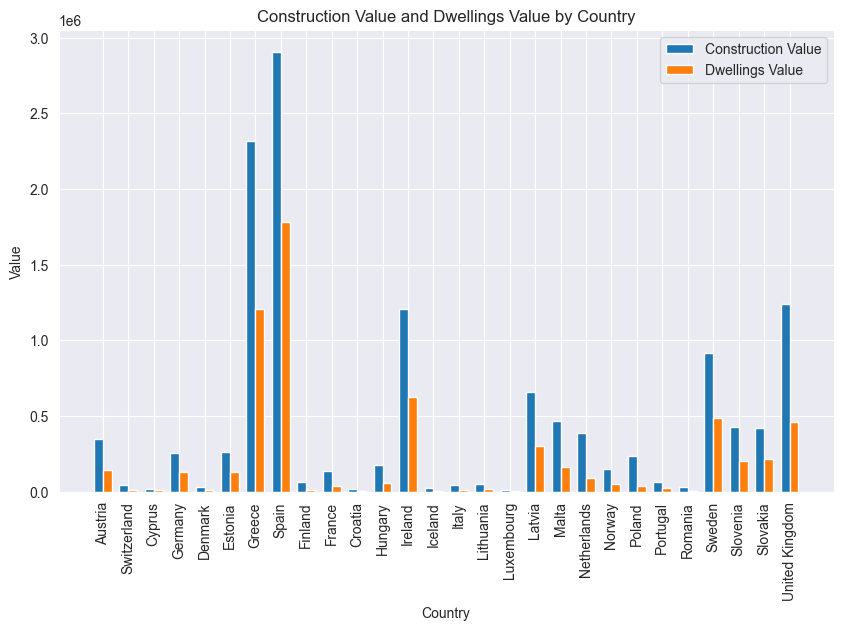

In [12]:
unique_countries = gfcf['Country'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(unique_countries))

rect1 = ax.bar(index, gfcf.groupby('Country')['Construction Value'].sum(), bar_width, label='Construction Value')
rect2 = ax.bar(index + bar_width, gfcf.groupby('Country')['Dwellings Value'].sum(), bar_width, label='Dwellings Value')

ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Construction Value and Dwellings Value by Country')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(unique_countries, rotation='vertical')
ax.legend()

plt.show()

Year
2015-01-01    53056.267857
2016-01-01    53541.653571
2017-01-01    56063.150000
2018-01-01    59404.171429
2019-01-01    63321.317857
2020-01-01    54909.325926
2021-01-01    61280.251852
2022-01-01    69422.338462
Name: Construction Value, dtype: float64


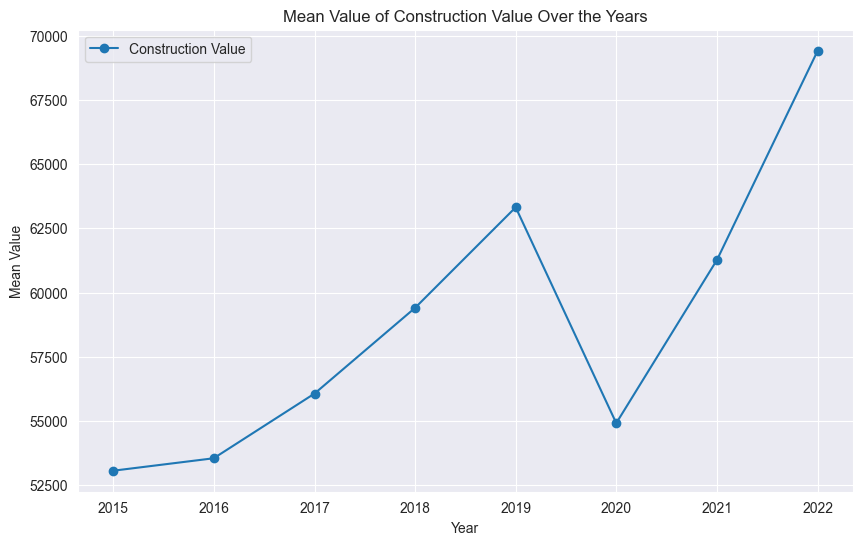

In [13]:
mean_values = gfcf.groupby('Year')['Construction Value'].mean()

print(mean_values)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(mean_values.index, mean_values, marker='o', label='Construction Value')


ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Value of Construction Value Over the Years')
ax.legend()

plt.show()

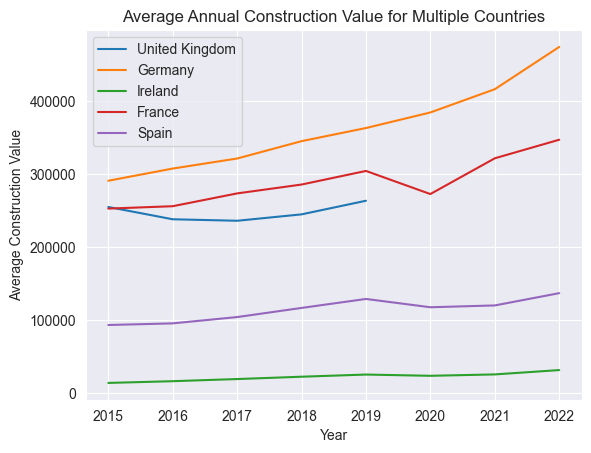

In [14]:
# Calculate mean values for each year and country
countries = ['United Kingdom', 'Germany','Ireland', 'France', 'Spain']
# mean_values = gfcf.groupby(['Year', 'Country']).mean().reset_index()

# Plot the mean production index values over time for each country
for country in countries:
    country_data = gfcf[gfcf['Country'] == country]
    mean_values = country_data.groupby('Year')['Construction Value'].mean()
    plt.plot(mean_values.index, mean_values.values, label=country)


plt.xlabel('Year')
plt.ylabel('Average Construction Value')
plt.title('Average Annual Construction Value for Multiple Countries')
plt.legend()
plt.show()

        unit       Year  Construction Value         Country  Dwellings Value
0    CP_MEUR 2015-01-01             36418.8         Austria          14658.8
1    CP_MEUR 2016-01-01             37227.7         Austria          15249.6
2    CP_MEUR 2017-01-01             39064.2         Austria          16556.5
3    CP_MEUR 2018-01-01             42484.1         Austria          17376.3
4    CP_MEUR 2019-01-01             45310.9         Austria          18672.7
..       ...        ...                 ...             ...              ...
215  CP_MEUR 2015-01-01            255287.7  United Kingdom          90926.4
216  CP_MEUR 2016-01-01            238457.3  United Kingdom          85255.3
217  CP_MEUR 2017-01-01            236405.9  United Kingdom          89516.0
218  CP_MEUR 2018-01-01            245183.2  United Kingdom          96023.6
219  CP_MEUR 2019-01-01            263833.4  United Kingdom          99809.7

[220 rows x 5 columns]
          Year  Construction Value  Country  Dwellin

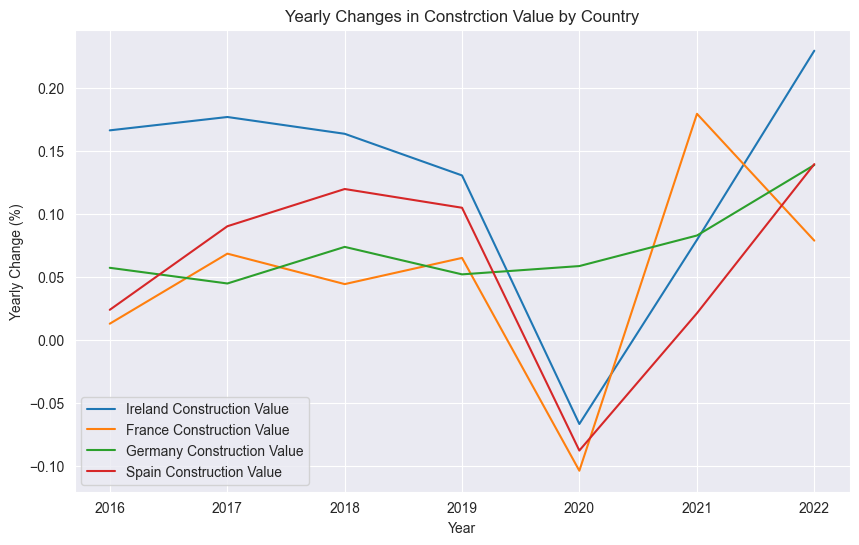

In [15]:
countries = ['Ireland', 'France', 'Germany', 'Spain']


print(gfcf)

# filter the data
filtered_data = gfcf[gfcf['Country'].isin(countries)]
filtered_data = filtered_data.drop('unit',axis=1)

print(filtered_data)

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Value'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Value')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Constrction Value by Country')
ax.legend()
plt.show()